In [9]:
import matplotlib.pyplot as plt
import itertools
import json
import numpy as np
from pylhe import read_lhe_with_attributes, read_num_events
import itertools
import json
import math
import vector

### Defining Functions

In [125]:
def extract_particle_data(lhe_file, particle_ids):
    """Extract data for specific particle IDs from the LHE file."""
    
    events = read_lhe_with_attributes(lhe_file)

    num_events = read_num_events(lhe_file)

    particle_data = []


    if not isinstance(particle_ids, list):
        particle_ids = [particle_ids] 


    for event_index, event in enumerate(itertools.islice(events, num_events)):
        for particle in event.particles:

            if particle.id in particle_ids:  
                particle_data.append({
                    'event': event_index,
                    'id': particle.id,
                    'px': particle.px,
                    'py': particle.py,
                    'pz': particle.pz,
                    'E': particle.e,
                    'status': particle.status
                })

    return particle_data
def extract_kinematic_data(particle_data):
    """Extract transverse momentum (pT), pseudorapidity (eta), and azimuthal angle (phi) for each particle."""
    kinematic_data = []


    for particle in particle_data:
        px, py, pz = particle['px'], particle['py'], particle['pz']


        pt = math.sqrt(px**2 + py**2)


        phi = math.atan2(py, px)


        theta = math.acos(pz / math.sqrt(px**2 + py**2 + pz**2))
        eta = -math.log(math.tan(theta / 2))


        kinematic_data.append({
            'pt': pt,
            'eta': eta,
            'phi': phi,
        })

    return kinematic_data


### Importing Data

In [178]:
lhe_file = r"C:\Users\gabri\OneDrive\Documents\University\Mphys\TriBoson\Week4\unweighted_events.lhe"

z_data = extract_particle_data(lhe_file, particle_ids=[23])
muon_data = extract_particle_data(lhe_file, particle_ids=[13])

w_data = extract_particle_data(lhe_file, particle_ids=[24])
electron_neutrino_data = extract_particle_data(lhe_file, particle_ids=[12])

w_anti_data = extract_particle_data(lhe_file, particle_ids=[-24])
electron_data = extract_particle_data(lhe_file, particle_ids=[11])

### Creating Four vectors

In [195]:
z_four_momentum = vector.array({"E": [data["E"] for data in z_data], "px": [data["px"] for data in z_data], "py": [data["py"] for data in z_data], "pz": [data["pz"] for data in z_data]})
muon_four_momentum = vector.array({ "E": [data["E"] for data in muon_data], "px": [data["px"] for data in muon_data], "py": [data["py"] for data in muon_data], "pz": [data["pz"] for data in muon_data]})

w_four_momentum = vector.array({"E": [data["E"] for data in w_data], "px": [data["px"] for data in w_data], "py": [data["py"] for data in w_data], "pz": [data["pz"] for data in w_data]})
electron_neutrino_four_momentum = vector.array({ "E": [data["E"] for data in electron_neutrino_data], "px": [data["px"] for data in electron_neutrino_data], "py": [data["py"] for data in electron_neutrino_data], "pz": [data["pz"] for data in electron_neutrino_data]})


w_anti_four_momentum = vector.array({ "E": [data["E"] for data in w_anti_data], "px": [data["px"] for data in w_anti_data], "py": [data["py"] for data in w_anti_data], "pz": [data["pz"] for data in w_anti_data]})
electron_four_momentum = vector.array({ "E": [data["E"] for data in electron_data], "px": [data["px"] for data in electron_data], "py": [data["py"] for data in electron_data], "pz": [data["pz"] for data in electron_data]})

com_four_momentum = z_four_momentum + w_four_momentum + w_anti_four_momentum


In [201]:
print(z_four_momentum)

[(  8.44783423,   48.58474826, 4742.7163662 , 4743.832625  )
 ( 78.95828816,   31.4303258 ,  -48.98029532,  132.6607513 )
 (-31.13672292,   30.50487191, 1008.6614791 , 1013.6291329 ) ...
 (111.31871207,   61.09848378,  239.0148896 ,  285.57511213)
 (  5.96637952, -114.860603  , -192.55193233,  246.23531284)
 ( 31.18754334,   49.53231693, -117.51936135,  159.20733039)]


### Creating Three vectors

In [159]:
z_three_momentum = vector.array({ "px": [data["px"] for data in z_data], "py": [data["py"] for data in z_data], "pz": [data["pz"] for data in z_data]})
muon_three_momentum = vector.array({ "px": [data["px"] for data in muon_data], "py": [data["py"] for data in muon_data], "pz": [data["pz"] for data in muon_data]})

w_three_momentum = vector.array({ "px": [data["px"] for data in w_data], "py": [data["py"] for data in w_data], "pz": [data["pz"] for data in w_data]})
electron_neutrino_three_momentum = vector.array({ "px": [data["px"] for data in electron_neutrino_data], "py": [data["py"] for data in electron_neutrino_data], "pz": [data["pz"] for data in electron_neutrino_data]})

w_anti_three_momentum = vector.array({ "px": [data["px"] for data in w_anti_data], "py": [data["py"] for data in w_anti_data], "pz": [data["pz"] for data in w_anti_data]})
electron_three_momentum = vector.array({ "E": [data["E"] for data in electron_data], "px": [data["px"] for data in electron_data], "py": [data["py"] for data in electron_data], "pz": [data["pz"] for data in electron_data]})

com_three_momentum = z_three_momentum + w_three_momentum + w_anti_three_momentum

In [202]:
(com_three_momentum)

MomentumNumpy3D([( 4.00000033e-11,  0.00000000e+00, 5308.32826387),
                 ( 5.00003239e-09,  0.00000000e+00, -594.52726859),
                 ( 1.00001785e-09, -9.99989425e-10, 1414.43417122), ...,
                 ( 4.00000744e-09,  1.00001785e-09, 1403.52311304),
                 (-1.99996464e-10,  1.00000364e-09,  310.86868315),
                 (-2.99997360e-10, -3.55271368e-15, -387.96171929)],
                dtype=[('x', '<f8'), ('y', '<f8'), ('z', '<f8')])

### Rotate axis along com

In [206]:
z_axis = vector.obj(x=0, y=0, z=1)

# Rotation Axis
rotation_axes = com_three_momentum.cross(z_axis).unit() 
print(rotation_axes.shape)

# Rotation Angle
cos_theta = com_three_momentum.dot(z_axis) / (abs(com_three_momentum) * abs(z_axis))
rotation_angles = np.arccos(cos_theta)

# Rotate Centre of Mass Momentum onto the z axis
com_momentum_along_z = com_three_momentum.rotate_axis(rotation_axes, rotation_angles)

# Rotating Z and muon based on the rotation of com
z_rotated = z_three_momentum.rotate_axis(rotation_axes, rotation_angles)
z_rotated2 = z_four_momentum.rotate_axis(rotation_axes, rotation_angles)

muon_rotated = muon_three_momentum.rotate_axis(rotation_axes, rotation_angles)

w_rotated = w_three_momentum.rotate_axis(rotation_axes, rotation_angles)
electron_rotated = electron_three_momentum.rotate_axis(rotation_axes, rotation_angles)

w_anti_rotated = w_anti_three_momentum.rotate_axis(rotation_axes, rotation_angles)
electron_neutrino_rotated = electron_neutrino_three_momentum.rotate_axis(rotation_axes, rotation_angles)

(10000,)
[(  8.44783423,   48.58474826, 4742.7163662 )
 (-78.95828816,   31.4303258 ,   48.98029532)
 (-31.13672292,   30.50487191, 1008.6614791 ) ...
 (111.31871207,   61.09848378,  239.0148896 )
 (  5.96637952, -114.860603  , -192.55193233)
 (-31.1887165 ,   49.53157824,  117.51936135)]


### Rotated Four Momenta 

In [161]:
z_four_momentum_rotated = vector.array({"E": [data["E"] for data in z_data], "px": z_rotated.px, "py": z_rotated.py, "pz": z_rotated.pz})
muon_four_momentum_rotated = vector.array({"E": [data["E"] for data in muon_data], "px": muon_rotated.px, "py": muon_rotated.py, "pz": muon_rotated.pz})

w_four_momentum_rotated = vector.array({"E": [data["E"] for data in w_data], "px": w_rotated.px, "py": w_rotated.py, "pz": w_rotated.pz})
electron_neutrino_four_momentum_rotated = vector.array({"E": [data["E"] for data in electron_neutrino_data], "px": electron_neutrino_rotated.px, "py": electron_neutrino_rotated.py, "pz": electron_neutrino_rotated.pz})

w_anti_four_momentum_rotated = vector.array({"E": [data["E"] for data in w_anti_data], "px": w_anti_rotated.px, "py": w_anti_rotated.py, "pz": w_anti_rotated.pz})
electron_four_momentum_rotated = vector.array({"E": [data["E"] for data in electron_data], "px": electron_rotated.px, "py": electron_rotated.py, "pz": electron_rotated.pz})

com_four_momentum_rotated = vector.array({"E": com_four_momentum.E, "px": com_three_momentum.px, "py": com_three_momentum.py, "pz": com_three_momentum.pz})

### Boosting into COM Frame

In [207]:

boost_vector_into_com = com_four_momentum_rotated.to_beta3()

z_four_momentum_rotated_boost_com = z_four_momentum_rotated.boost(-boost_vector_into_com)
print(z_four_momentum_rotated_boost_com)
muon_four_momentum_rotated_boost_com = muon_four_momentum_rotated.boost(-boost_vector_into_com)

w_four_momentum_rotated_boost_com = w_four_momentum_rotated.boost(-boost_vector_into_com)
electron_neutrino_four_momentum_rotated_boost_com = electron_neutrino_four_momentum_rotated.boost(-boost_vector_into_com)

w_anti_four_momentum_rotated_boost_com = w_anti_four_momentum_rotated.boost(-boost_vector_into_com)
electron_four_momentum_rotated_boost_com = electron_four_momentum_rotated.boost(-boost_vector_into_com)

[(  8.44783423,   48.58474826,  401.39099289, 414.37202243)
 (-78.95828816,   31.4303258 ,  179.44282207, 217.71433577)
 (-31.13672292,   30.50487191,  255.38781595, 274.35192031) ...
 (111.31871207,   61.09848378,  -82.82331724, 176.87489674)
 (  5.96637952, -114.860603  , -305.14109965, 341.56503531)
 (-31.1887165 ,   49.53157824,  284.2396631 , 303.8558208 )]


In [163]:
z_three_momentum_rotated_boost_com = vector.array({"px": z_four_momentum_rotated_boost_com.px, "py": z_four_momentum_rotated_boost_com.py, "pz": z_four_momentum_rotated_boost_com.pz})
muon_three_momentum_rotated_boost_com = vector.array({"px": muon_four_momentum_rotated_boost_com.px, "py": muon_four_momentum_rotated_boost_com.py, "pz": muon_four_momentum_rotated_boost_com.pz})

w_three_momentum_rotated_boost_com = vector.array({"px": w_four_momentum_rotated_boost_com.px, "py": w_four_momentum_rotated_boost_com.py, "pz": w_four_momentum_rotated_boost_com.pz})
electron_neutrino_three_momentum_rotated_boost_com = vector.array({"px": electron_neutrino_four_momentum_rotated_boost_com.px, "py": electron_neutrino_four_momentum_rotated_boost_com.py, "pz": electron_neutrino_four_momentum_rotated_boost_com.pz})

w_anti_three_momentum_rotated_boost_com = vector.array({"px": w_anti_four_momentum_rotated_boost_com.px, "py": w_anti_four_momentum_rotated_boost_com.py, "pz": w_anti_four_momentum_rotated_boost_com.pz})
electron_three_momentum_rotated_boost_com = vector.array({"px": electron_four_momentum_rotated_boost_com.px, "py": electron_four_momentum_rotated_boost_com.py, "pz": electron_four_momentum_rotated_boost_com.pz})

### Rotation for Z Boson

In [109]:
# Step 2: Define the target direction (z-axis)
target_vector = vector.obj(x=0, y=0, z=1)

# Step 3: Calculate the rotation axis (cross product) and angle using dot product
# Calculate the rotation axes for all vectors
rotation_axes = z_three_momentum_rotated_boost_com.cross(target_vector).unit()

# Calculate the cosine of the angles using the dot product
cos_theta = z_three_momentum_rotated_boost_com.dot(target_vector) / (abs(z_three_momentum_rotated_boost_com) * abs(target_vector))

# Step 4: Calculate the rotation angles using arccos
rotation_angles = np.arccos(cos_theta)

# Step 5: Rotate the initial vectors using rotate_axis
z_three_momentum_rotated_boost_com_rotated = z_three_momentum_rotated_boost_com.rotate_axis(rotation_axes, rotation_angles)
muon_three_momentum_rotated_boost_com_rotated = muon_three_momentum_rotated_boost_com.rotate_axis(rotation_axes, rotation_angles)


print(muon_three_momentum_rotated_boost_com_rotated)

[(  1.60675958,  43.27015187, 261.04930215)
 ( 12.54419888,  27.1156435 ,  18.365704  )
 ( -7.81938503, -44.19197524, 115.14558323) ...
 (  0.16766999, -17.56286344, 157.40270792)
 ( 29.71844104,  34.44011494, 239.13594348)
 (-28.3861539 , -11.56426062,  33.80793133)]


### Rotation for W Boson

In [164]:
# Step 2: Define the target direction (z-axis)
target_vector = vector.obj(x=0, y=0, z=1)

# Step 3: Calculate the rotation axis (cross product) and angle using dot product
# Calculate the rotation axes for all vectors
rotation_axes = w_three_momentum_rotated_boost_com.cross(target_vector).unit()

# Calculate the cosine of the angles using the dot product
cos_theta = w_three_momentum_rotated_boost_com.dot(target_vector) / (abs(w_three_momentum_rotated_boost_com) * abs(target_vector))

# Step 4: Calculate the rotation angles using arccos
rotation_angles = np.arccos(cos_theta)

# Step 5: Rotate the initial vectors using rotate_axis

w_three_momentum_rotated_boost_com_rotated = w_three_momentum_rotated_boost_com.rotate_axis(rotation_axes, rotation_angles)
electron_neutrino_three_momentum_rotated_boost_com_rotated = electron_neutrino_three_momentum_rotated_boost_com.rotate_axis(rotation_axes, rotation_angles)

### Rotation for W- Boson

In [167]:
# Step 2: Define the target direction (z-axis)
target_vector = vector.obj(x=0, y=0, z=1)

# Step 3: Calculate the rotation axis (cross product) and angle using dot product
# Calculate the rotation axes for all vectors
rotation_axes = w_anti_three_momentum_rotated_boost_com.cross(target_vector).unit()

# Calculate the cosine of the angles using the dot product
cos_theta = w_anti_three_momentum_rotated_boost_com.dot(target_vector) / (abs(w_anti_three_momentum_rotated_boost_com) * abs(target_vector))

# Step 4: Calculate the rotation angles using arccos
rotation_angles = np.arccos(cos_theta)

# Step 5: Rotate the initial vectors using rotate_axis
w_anti_three_momentum_rotated_boost_com_rotated = w_anti_three_momentum_rotated_boost_com.rotate_axis(rotation_axes, rotation_angles)
electron_three_momentum_rotated_boost_com_rotated = electron_three_momentum_rotated_boost_com.rotate_axis(rotation_axes, rotation_angles)

In [168]:
z_four_momentum_rotated_boost_com_rotated = vector.array({"E": [data["E"] for data in z_data], "px": z_three_momentum_rotated_boost_com_rotated.px, "py": z_three_momentum_rotated_boost_com_rotated.py, "pz": z_three_momentum_rotated_boost_com_rotated.pz})
muon_four_momentum_rotated_boost_com_rotated = vector.array({"E": [data["E"] for data in muon_data], "px": muon_three_momentum_rotated_boost_com_rotated.px, "py": muon_three_momentum_rotated_boost_com_rotated.py, "pz": muon_three_momentum_rotated_boost_com_rotated.pz})

w_four_momentum_rotated_boost_com_rotated = vector.array({"E": [data["E"] for data in w_data], "px": w_three_momentum_rotated_boost_com_rotated.px, "py": w_three_momentum_rotated_boost_com_rotated.py, "pz": w_three_momentum_rotated_boost_com_rotated.pz})
electron_neutrino_four_momentum_rotated_boost_com_rotated = vector.array({"E": [data["E"] for data in electron_neutrino_data], "px": electron_neutrino_three_momentum_rotated_boost_com_rotated.px, "py": electron_neutrino_three_momentum_rotated_boost_com_rotated.py, "pz": electron_neutrino_three_momentum_rotated_boost_com_rotated.pz})

w_anti_four_momentum_rotated_boost_com_rotated = vector.array({"E": [data["E"] for data in w_anti_data], "px": w_anti_three_momentum_rotated_boost_com_rotated.px, "py": w_anti_three_momentum_rotated_boost_com_rotated.py, "pz": w_anti_three_momentum_rotated_boost_com_rotated.pz})
electron_four_momentum_rotated_boost_com_rotated = vector.array({"E": [data["E"] for data in electron_data], "px": electron_three_momentum_rotated_boost_com_rotated.px, "py": electron_three_momentum_rotated_boost_com_rotated.py, "pz": electron_three_momentum_rotated_boost_com_rotated.pz})

com_four_momentum_rotated = vector.array({"E": com_four_momentum.E, "px": com_three_momentum.px, "py": com_three_momentum.py, "pz": com_three_momentum.pz})

In [170]:
boost_vector_into_z_rest = z_four_momentum_rotated_boost_com_rotated.to_beta3()

z_four_momentum_rotated_boost_com_rotated_boost_rest = z_four_momentum_rotated_boost_com_rotated.boost(-boost_vector_into_z_rest)
muon_four_momentum_rotated_boost_com_boost_rest = muon_four_momentum_rotated_boost_com_rotated.boost(-boost_vector_into_z_rest)

boost_vector_into_w_rest = w_four_momentum_rotated_boost_com_rotated.to_beta3()

w_four_momentum_rotated_boost_com_rotated_boost_rest = w_four_momentum_rotated_boost_com_rotated.boost(-boost_vector_into_w_rest)
electron_neutrino_four_momentum_rotated_boost_com_boost_rest = electron_neutrino_four_momentum_rotated_boost_com_rotated.boost(-boost_vector_into_w_rest)

boost_vector_into_w_anti_rest = w_anti_four_momentum_rotated_boost_com_rotated.to_beta3()

w_anti_four_momentum_rotated_boost_com_rotated_boost_rest = w_anti_four_momentum_rotated_boost_com_rotated.boost(-boost_vector_into_w_anti_rest)
electron_four_momentum_rotated_boost_com_boost_rest = electron_four_momentum_rotated_boost_com_rotated.boost(-boost_vector_into_w_anti_rest)

In [210]:
print(z_four_momentum_rotated_boost_com_rotated_boost_rest)

[(-6.31088724e-30, -5.04870979e-29, -1.13686838e-13, 4726.56338169)
 (            nan,             nan,             nan,           nan)
 (-2.52435490e-29,  1.26217745e-29, -5.68434189e-14,  979.95971336) ...
 (-3.15544362e-30, -3.15544362e-30,  0.00000000e+00,  242.00942629)
 (            nan,             nan,             nan,           nan)
 (            nan,             nan,             nan,           nan)]


C:\Users\gabri\AppData\Local\Temp\ipykernel_1708\4048211444.py:15: RuntimeWarning: invalid value encountered in arcsin
  theta = np.arcsin(sin_theta)


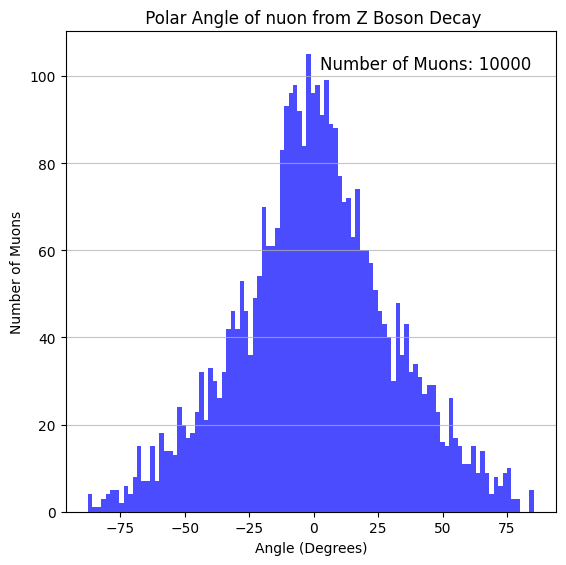

In [208]:
px = muon_four_momentum_rotated_boost_com_boost_rest.px
py = muon_four_momentum_rotated_boost_com_boost_rest.py
pz = muon_four_momentum_rotated_boost_com_boost_rest.pz

# Calculate the magnitude of the momentum vector
transverse_momentum_magnitude = np.sqrt(px**2 + py**2)

# Step 3: Calculate the cosine of the angle between the 3-momentum and the z-axis
sin_theta = pz / transverse_momentum_magnitude

# Ensure cos_theta is within the range [-1, 1] to avoid numerical errors in arccos
#cos_theta = np.clip(cos_theta, -1, 1)

# Compute the angle in radians
theta = np.arcsin(sin_theta)

# Convert to degrees (optional)
theta_degrees = np.degrees(theta)

fig, ax = plt.subplots(1, 1, figsize=(6, 6))

ax.hist(theta_degrees, bins=100, alpha=0.7, color='blue')
ax.set_xlabel('Angle (Degrees)')
ax.set_ylabel('Number of Muons')
ax.set_title(' Polar Angle of nuon from Z Boson Decay')
ax.grid(axis='y', alpha=0.75)

ax.text(0.95, 0.95, f'Number of Muons: {len(theta_degrees)}', 
        ha='right', va='top', fontsize=12, transform=ax.transAxes)

plt.tight_layout(rect=[0, 0, 0.96, 0.96])  # Adjust layout to make room for the overall title
save_path = r"C:\Users\gabri\OneDrive\Documents\University\Mphys\TriBoson\Week4\Plots\Z_Polarity_Analysis.png"
plt.savefig(save_path, dpi=300) 
plt.show()




C:\Users\gabri\AppData\Local\Temp\ipykernel_1708\1798435788.py:15: RuntimeWarning: invalid value encountered in arcsin
  theta = np.arcsin(sin_theta)


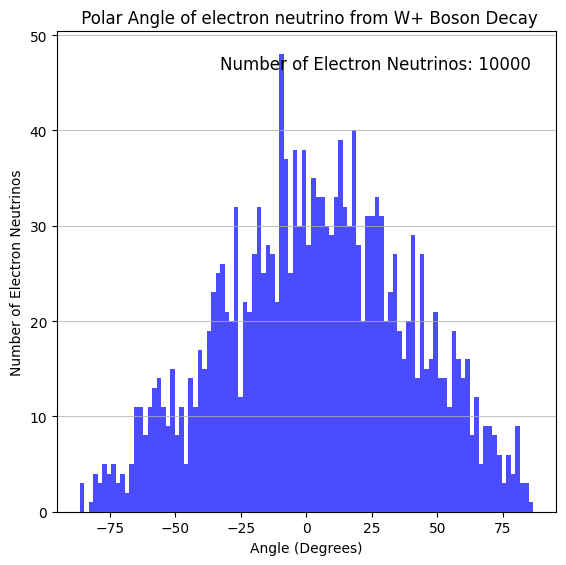

In [193]:
px = electron_neutrino_four_momentum_rotated_boost_com_boost_rest.px
py = electron_neutrino_four_momentum_rotated_boost_com_boost_rest.py
pz = electron_neutrino_four_momentum_rotated_boost_com_boost_rest.pz

# Calculate the magnitude of the momentum vector
transverse_momentum_magnitude = np.sqrt(px**2 + py**2)

# Step 3: Calculate the cosine of the angle between the 3-momentum and the z-axis
sin_theta = pz / transverse_momentum_magnitude

# Ensure cos_theta is within the range [-1, 1] to avoid numerical errors in arccos
#cos_theta = np.clip(cos_theta, -1, 1)

# Compute the angle in radians
theta = np.arcsin(sin_theta)

# Convert to degrees (optional)
theta_degrees = np.degrees(theta)

fig, ax = plt.subplots(1, 1, figsize=(6, 6))

ax.hist(theta_degrees, bins=100, alpha=0.7, color='blue')
ax.set_xlabel('Angle (Degrees)')
ax.set_ylabel('Number of Electron Neutrinos')
ax.set_title(' Polar Angle of electron neutrino from W+ Boson Decay')
ax.grid(axis='y', alpha=0.75)

ax.text(0.95, 0.95, f'Number of Electron Neutrinos: {len(theta_degrees)}', 
        ha='right', va='top', fontsize=12, transform=ax.transAxes)

plt.tight_layout(rect=[0, 0, 0.96, 0.96])  # Adjust layout to make room for the overall title
save_path = r"C:\Users\gabri\OneDrive\Documents\University\Mphys\TriBoson\Week4\Plots\W_Polarity_Analysis.png"
plt.savefig(save_path, dpi=300) 
plt.show()




C:\Users\gabri\AppData\Local\Temp\ipykernel_1708\177811525.py:15: RuntimeWarning: invalid value encountered in arcsin
  theta = np.arcsin(sin_theta)


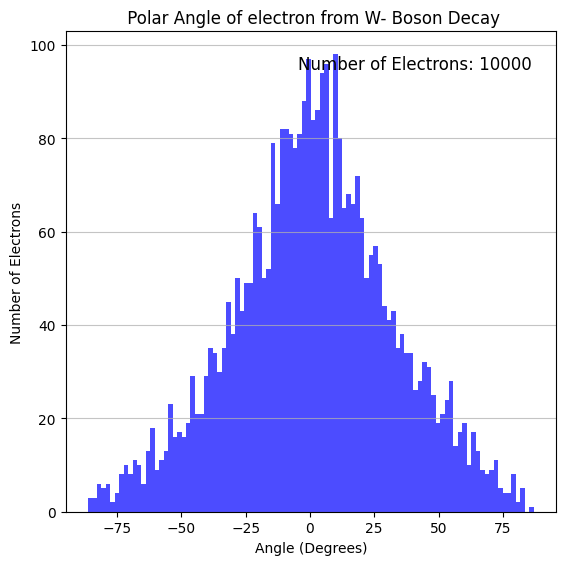

In [192]:
px = electron_four_momentum_rotated_boost_com_boost_rest.px
py = electron_four_momentum_rotated_boost_com_boost_rest.py
pz = electron_four_momentum_rotated_boost_com_boost_rest.pz

# Calculate the magnitude of the momentum vector
transverse_momentum_magnitude = np.sqrt(px**2 + py**2)

# Step 3: Calculate the cosine of the angle between the 3-momentum and the z-axis
sin_theta = pz / transverse_momentum_magnitude

# Ensure cos_theta is within the range [-1, 1] to avoid numerical errors in arccos
#cos_theta = np.clip(cos_theta, -1, 1)

# Compute the angle in radians
theta = np.arcsin(sin_theta)

# Convert to degrees (optional)
theta_degrees = np.degrees(theta)

fig, ax = plt.subplots(1, 1, figsize=(6, 6))

ax.hist(theta_degrees, bins=100, alpha=0.7, color='blue')
ax.set_xlabel('Angle (Degrees)')
ax.set_ylabel('Number of Electrons')
ax.set_title(' Polar Angle of electron from W- Boson Decay')
ax.grid(axis='y', alpha=0.75)

ax.text(0.95, 0.95, f'Number of Electrons: {len(theta_degrees)}', 
        ha='right', va='top', fontsize=12, transform=ax.transAxes)

plt.tight_layout(rect=[0, 0, 0.96, 0.96])  # Adjust layout to make room for the overall title
save_path = r"C:\Users\gabri\OneDrive\Documents\University\Mphys\TriBoson\Week4\Plots\W_anti_Polarity_Analysis.png"
plt.savefig(save_path, dpi=300) 
plt.show()

